In [1]:

## decay vs homogeneiety combine score 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statannot import add_stat_annotation 

In [ ]:
## 1. Fig3k --- ---

In [2]:
out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
decay=pd.read_csv(out+'final_30C_37C_classify_fast_vs_slower_allinfo',sep='\t')
decay[['transcript','gene']] = decay['Name'].str.split('::',1,expand = True)

original_seq_df = pd.read_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/bruno_et_al_2010_tx_loci.txt',sep='\t')
f_annotations = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/bruno_et_al_2010_tx_loci.annotation"
annotation = pd.read_csv(f_annotations,sep='\t')
df = pd.merge(original_seq_df, annotation,how='left',on=['gene','gene'])

### pure condition
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
pure = pd.read_csv(dir+'homo_pure_allinfo_vivo.txt', sep='\t')
pure.columns 
pure=pure.dropna()
pure['weighted_corr'] = pd.to_numeric(pure['weighted_corr'], errors='coerce')
pure['replicate'] = pd.to_numeric(pure['replicate'], errors='coerce')
pure = pure[(pure['replicate'] == 0) | (pure['replicate'] == 1) | (pure['replicate'] == 2)]
pure['window_start'] = pd.to_numeric(pure['window_start'], errors='coerce')
pure['window_end'] = pd.to_numeric(pure['window_end'], errors='coerce')
pure['window_start'] = pure['window_start'].astype(int)
pure['window_end'] = pure['window_end'].astype(int)
pure['win_length'] = pure['window_end'].astype(int) - pure['window_start'].astype(int)
pure['id'] = pure['gene'] + '_' + pure['window_start'].astype(str)  + '_' + pure['window_end'].astype(str)
aver = pure.groupby(['condition', 'id', 'region'])['weighted_corr'].mean()
aver = aver.reset_index()
aver[['gene','window_start','window_end']] = aver['id'].str.split('_',2,expand = True)
pure=aver


combine = pd.merge(pure,df,how='left',on=['gene','gene']) 
dplot = combine.drop_duplicates()
dplot = dplot.dropna()

dplot = dplot.sort_values(by='gene')
dplot['Name'] = dplot['gene']
dplot.columns

### integrate homo with decay -------------------

homo_30C = dplot[dplot['condition'] == '30C']
homo_37C = dplot[dplot['condition'] == '37C']

### merge with decay
merge_30C = pd.merge(homo_30C,decay,how='left',on=['Name','Name'])
merge_30C['halflife'] = merge_30C['halflife_x']
merge_37C = pd.merge(homo_37C,decay,how='left',on=['Name','Name'])
merge_37C['halflife'] = merge_37C['halflife_y']
merge = pd.concat([merge_30C,merge_37C])
merge['halflife'] = merge['halflife'].astype(str)

print(merge_30C.columns)
print(merge_37C.columns)
print(merge.columns) 

/tmp/ipykernel_18067/3674466577.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  decay[['transcript','gene']] = decay['Name'].str.split('::',1,expand = True)


Index(['condition', 'id', 'region', 'weighted_corr', 'gene_x', 'window_start',
       'window_end', 'Unnamed: 0_x', 'seq', 'tx_start', 'cds_start', 'cds_end',
       'tx_end', 'strand', 'Name', 'Unnamed: 0_y', 'label_x', 'step0_x',
       'group_x', 'halflife_x', 'condition_x', 'cluster_x', 'label_y',
       'step0_y', 'group_y', 'halflife_y', 'condition_y', 'cluster_y', 'difff',
       'cluster30_cluster37', 'fast_slow_37', 'transcript', 'gene_y',
       'halflife'],
      dtype='object')
Index(['condition', 'id', 'region', 'weighted_corr', 'gene_x', 'window_start',
       'window_end', 'Unnamed: 0_x', 'seq', 'tx_start', 'cds_start', 'cds_end',
       'tx_end', 'strand', 'Name', 'Unnamed: 0_y', 'label_x', 'step0_x',
       'group_x', 'halflife_x', 'condition_x', 'cluster_x', 'label_y',
       'step0_y', 'group_y', 'halflife_y', 'condition_y', 'cluster_y', 'difff',
       'cluster30_cluster37', 'fast_slow_37', 'transcript', 'gene_y',
       'halflife'],
      dtype='object')
Index(['co

/tmp/ipykernel_18067/3674466577.py:26: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  aver[['gene','window_start','window_end']] = aver['id'].str.split('_',2,expand = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>120    36
40.0    32
20.0    19
60.0     3
Name: halflife, dtype: int64
<60(mins)     51
>=60(mins)    39
Name: halflife, dtype: int64
<60(mins) v.s. >=60(mins): Mann-Whitney-Wilcoxon test two-sided, P_val=6.367e-01 U_stat=9.360e+02


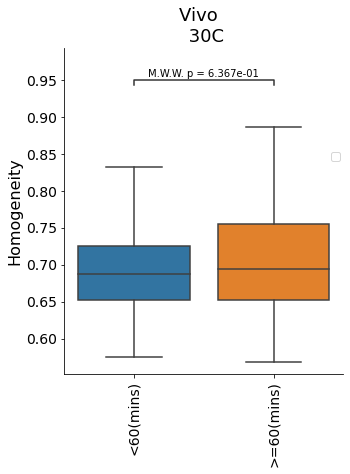

In [3]:
### 30C ---

print(merge_30C.halflife.value_counts())
dplot = merge_30C[(merge_30C['region'] == '3UTR') | (merge_30C['region'] == 'CDS')]
dplot['halflife'] = np.where((dplot['halflife'] == '20.0') | (dplot['halflife'] == '40.0'), '<60(mins)', dplot['halflife'])
dplot['halflife'] = np.where((dplot['halflife'] == '60.0') | (dplot['halflife'] == '120.0') | (dplot['halflife'] == '>120'), '>=60(mins)', dplot['halflife'])
print(dplot.halflife.value_counts())

plt.figure(figsize=(5,6))
order = ['<60(mins)','>=60(mins)']
ax = sns.boxplot(data=dplot, x='halflife',y='weighted_corr', order = order, showfliers = False, dodge=False)  # order = order,  hue='condition',
plt.title('Vivo  \n 30C',fontsize = 18)
plt.xlabel('',fontsize = 16) 
plt.ylabel('Homogeneity',fontsize = 16)
plt.xticks(fontsize = 14,rotation=90) 
plt.yticks(fontsize = 14) 
plt.legend(loc='best', bbox_to_anchor=(1.01, 0.7),prop={'size': 12})
ax.spines[['right', 'top']].set_visible(False) 


add_stat_annotation(ax, data = dplot, x='halflife',y='weighted_corr',order = order,
                    box_pairs = [('<60(mins)','>=60(mins)')
                                 ],
                    comparisons_correction = None,
                    test="Mann-Whitney", text_format='full', loc='inside', line_offset_to_box=0.1, verbose=3)  #line_offset_to_box=-0.001,

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'Fig3k_vivo_30C_decay.pdf',bbox_inches='tight', dpi=300) 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


20.0     507
40.0      48
>120      31
60.0       6
120.0      3
Name: halflife, dtype: int64
<60(mins)     555
>=60(mins)     40
Name: halflife, dtype: int64
<60(mins) v.s. >=60(mins): Mann-Whitney-Wilcoxon test two-sided, P_val=4.444e-02 U_stat=1.321e+04


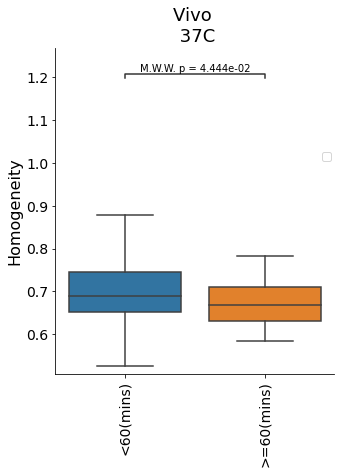

In [4]:
### 37C ---

print(merge_37C.halflife.value_counts())
dplot = merge_37C[(merge_37C['region'] == '3UTR') | (merge_37C['region'] == 'CDS')]
dplot['halflife'] = np.where((dplot['halflife'] == '20.0') | (dplot['halflife'] == '40.0'), '<60(mins)', dplot['halflife'])
dplot['halflife'] = np.where((dplot['halflife'] == '60.0') | (dplot['halflife'] == '120.0') | (dplot['halflife'] == '>120'), '>=60(mins)', dplot['halflife'])
print(dplot.halflife.value_counts())

plt.figure(figsize=(5,6))
order = ['<60(mins)','>=60(mins)']
ax = sns.boxplot(data=dplot, x='halflife',y='weighted_corr', order = order, showfliers = False, dodge=False)  
plt.title('Vivo \n 37C',fontsize = 18)
plt.xlabel('',fontsize = 16) 
plt.ylabel('Homogeneity',fontsize = 16)
plt.xticks(fontsize = 14,rotation=90) 
plt.yticks(fontsize = 14) 
plt.legend(loc='best', bbox_to_anchor=(1.01, 0.7),prop={'size': 12})
ax.spines[['right', 'top']].set_visible(False) 


add_stat_annotation(ax, data = dplot, x='halflife',y='weighted_corr',order = order,
                    box_pairs = [('<60(mins)','>=60(mins)')
                                 ],
                    comparisons_correction = None,
                    test="Mann-Whitney", text_format='full', loc='inside', line_offset_to_box=0.1, verbose=3) 

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'Fig3k_vivo_37C_decay.pdf',bbox_inches='tight', dpi=300) 